Import Libraries and Raw Data

In [193]:
import pandas as pd
import sklearn.preprocessing as skpre
import sklearn.model_selection as skmod
import sklearn.linear_model as sklinmod
import sklearn.svm as sksvm
import sklearn.metrics as skmet
import sklearn.cluster as skclus
import seaborn as sns
import numpy as np
penguins = pd.read_csv('penguins_lter.csv')

penguins.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

Drop useless columns

In [194]:
penguins.drop(['studyName','Comments','Region','Sample Number','Stage','Individual ID','Date Egg','Island','Clutch Completion'],axis=1,inplace=True)
penguins.shape
# get rid of weird dot thing
penguins.Sex.replace('.',None,inplace=True)
penguins.dropna(axis=0,inplace=True)
penguins.shape


(325, 7)

Inspect

In [195]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 1 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              325 non-null    object 
 1   Culmen Depth (mm)    325 non-null    float64
 2   Flipper Length (mm)  325 non-null    float64
 3   Body Mass (g)        325 non-null    float64
 4   Sex                  325 non-null    object 
 5   Delta 15 N (o/oo)    325 non-null    float64
 6   Delta 13 C (o/oo)    325 non-null    float64
dtypes: float64(5), object(2)
memory usage: 17.8+ KB


Split Training Data for Predicting Species and then apply get dummies to Sex and Clutch Completion columns

In [196]:
# training stuff for classifying species
y = penguins.Species
X = penguins.drop(['Species','Sex'],axis=1)
X_train, X_test, y_train, y_test = skmod.train_test_split(X,y,test_size=.25,random_state=26)

cul_length = X_test['Culmen Length (mm)']
flip_length = X_test['Flipper Length (mm)']
cul_depth = X_test['Culmen Depth (mm)']

In [197]:
# map species names to numbers
namemap = {}
specnamelist = penguins.Species.unique()
for i in range(len(specnamelist)):
    namemap[specnamelist[i]] = i+1
namemap['Chinstrap penguin (Pygoscelis antarctica)'] = 3
namemap['Gentoo penguin (Pygoscelis papua)'] = 2

namemap
y_train = y_train.replace(namemap)
y_test = y_test.replace(namemap)

Normalize Data

In [198]:
# make dummy variables
X_train.info()
X_train = skpre.scale(X_train)
X_test = skpre.scale(X_test)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 294 to 327
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Depth (mm)    243 non-null    float64
 1   Flipper Length (mm)  243 non-null    float64
 2   Body Mass (g)        243 non-null    float64
 3   Delta 15 N (o/oo)    243 non-null    float64
 4   Delta 13 C (o/oo)    243 non-null    float64
dtypes: float64(5)
memory usage: 11.4 KB


Now Run Models to Classify Species

In [199]:
# SVM RBF Kernel
mod = sksvm.SVC(kernel='rbf')
mod.fit(X_train,y_train)
#mod.score(X_test,y_test)


y_pred = mod.predict(X_test)

confmat = skmet.confusion_matrix(y_test,y_pred)
print(confmat)

print(mod.score(X_test,y_test))

[[34  0  2]
 [ 0 31  0]
 [ 0  0 15]]
0.975609756097561


In [200]:
# SVM Linear Kernel
mod = sksvm.SVC(kernel='linear')
mod.fit(X_train,y_train)
#mod.score(X_test,y_test)

print(f'Coefficients: {mod.coef_}')
y_pred = mod.predict(X_test)

confmat = skmet.confusion_matrix(y_test,y_pred)
print(confmat)

print(mod.score(X_test,y_test))

Coefficients: [[ 0.93510355 -0.73431944 -0.67313506  0.18793878  0.05032072]
 [ 0.71705268 -0.96435328  0.18301049  0.13283096 -2.36652822]
 [-0.42077634  0.32656469  0.37059034 -0.50248124 -0.23842619]]
[[35  0  1]
 [ 0 31  0]
 [ 0  0 15]]
0.9878048780487805


In [201]:
# Logistic Regression Classifier
mod = sklinmod.LogisticRegressionCV()
mod.fit(X_train,y_train)
#mod.score(X_test,y_test)

print(f'Coefficients: {mod.coef_}')
y_pred = mod.predict(X_test)

confmat = skmet.confusion_matrix(y_test,y_pred)
print(confmat)

print(mod.score(X_test,y_test))

C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Coefficients: [[ 0.90728503 -1.24173871 -0.3055364   0.2044669  -1.21780391]
 [-1.003575    0.8698868   0.81126098 -0.58711898 -0.4077667 ]
 [ 0.09628997  0.3718519  -0.50572459  0.38265208  1.62557061]]
[[35  0  1]
 [ 0 31  0]
 [ 0  0 15]]
0.9878048780487805


Compare to K-Means

In [202]:
k3 = skclus.KMeans(n_clusters=3,random_state=0).fit_predict(X_test)

print(y_pred - (k3+1))



[ 0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2
  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0]


Plot Scatter Groupings

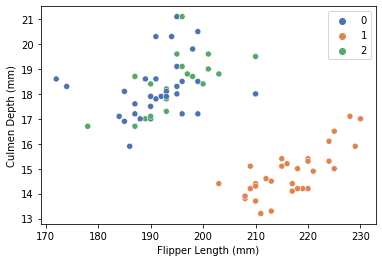

In [203]:
# choose two columns to plot for scatterplot


# attempt plotting
scatter = sns.scatterplot(x=cul_length, y=cul_depth,hue=k3,palette='deep')